<a href="https://colab.research.google.com/github/ShubhamTibrewal01/GAN_Assignment1/blob/main/ans4exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 

from tensorflow.keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128 

# train

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 169s 108ms/step - loss: 1.5827 - accuracy: 0.4579 - val_loss: 1.2143 - val_accuracy: 0.5725
Epoch 2/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.1525 - accuracy: 0.5944 - val_loss: 1.1993 - val_accuracy: 0.5789
Epoch 3/10
1563/1563 [==============================] - 169s 108ms/step - loss: 0.9999 - accuracy: 0.6489 - val_loss: 0.9566 - val_accuracy: 0.6714
Epoch 4/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9189 - accuracy: 0.6794 - val_loss: 0.9226 - val_accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 169s 108ms/step - loss: 0.8547 - accuracy: 0.7025 - val_loss: 0.9310 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 173s 111ms/step - loss: 0.8085 - accuracy: 0.7192 - val_loss: 0.8440 - val_accuracy: 0.7043
Epoch 7/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.7590 - accuracy: 0.7370 - val_

In [13]:
model.layers[6].get_weights()

[array([0.7697262 , 1.1132238 , 0.94780594, 1.0293839 , 0.98658335,
        0.8500795 , 0.90893966, 1.1839968 , 0.9561583 , 0.9897687 ,
        1.0891236 , 1.14306   , 0.95601153, 0.758735  , 0.7893087 ,
        0.8467036 , 0.9464697 , 1.2154527 , 1.1193614 , 1.0668724 ,
        0.87833816, 1.353502  , 0.85565716, 0.9939825 , 1.0877739 ,
        0.840426  , 0.99674815, 0.9316634 , 0.8790938 , 1.2523577 ,
        0.82556146, 0.79450226], dtype=float32),
 array([ 0.1335392 ,  0.13748392,  0.19258077,  0.14202268,  0.22600535,
         0.27005306,  0.12502916,  0.09628957,  0.03234578, -0.00108898,
         0.15725061,  0.12887345, -0.21434902,  0.1415328 , -0.04197128,
         0.15285747, -0.19883516, -0.06614788,  0.1314145 , -0.15156369,
         0.19000874,  0.16596627,  0.3347574 ,  0.00129927, -0.00204204,
         0.12514244, -0.16006558,  0.06505138,  0.02235344, -0.04735463,
         0.12320492, -0.0230481 ], dtype=float32),
 array([ 0.38021508,  0.39859065,  0.44555283,  0.6551

# analysis

In [14]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 8s 730ms/step - loss: 0.8110 - accuracy: 0.7208


[0.8109837770462036, 0.72079998254776]

In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

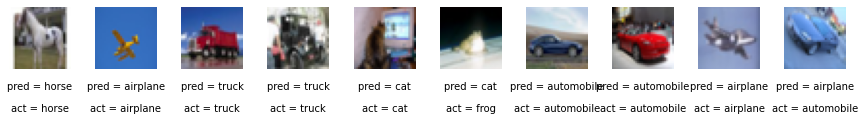

In [16]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
